In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = np.genfromtxt('Compare_sample2.txt', dtype=str)

b = np.genfromtxt('kepler_rapid_real.txt', skip_header=5, usecols=0, dtype=int)
c = np.genfromtxt('kepler_rapid_fps.txt', skip_header=5, usecols=0, dtype=int)



In [23]:
b_full = np.genfromtxt('kepler_rapid_real.txt', skip_header=5, usecols=[0, 7, 8, 9, 10, 11, 12], dtype=float)

In [97]:
n = 0

for star in range(len(a)):
    if a[star][1] == 'OGK':
        n += 1
        kic = int(a[star][0][4:])
        
        if kic in b:
            print(str(kic) + ' yay')
            row = np.abs(b_full[:,0] - int(kic)) < 0.01
            good = b_full[row][0]
            
            logg = np.random.normal(good[1], good[2], 10000)
            M = np.random.normal(good[3], good[4], 10000)
            Prot = np.random.normal(good[5], good[6], 10000)
            g = 10**logg

            G_const = 27488

            R = np.sqrt(G_const * M[M>0] / g[M>0])

            v = 8.05 * 2*np.pi*R / Prot[M>0]
            print(np.median(logg), np.std(logg), np.median(Prot))
            print('Radius = {0:04.2f} +/- {1:04.2f} R_sun; vel = {2:04.2f} +/- {3:04.2f} km/s'.format(np.median(R), np.std(R), np.median(v), np.std(v)))

            
        if kic in c:
            print('yay!')
            
print(n)

8212479 yay
2.2303552434175735 0.030100015951232566 119.05765005741492
Radius = 14.45 +/- 1.03 R_sun; vel = 6.14 +/- 0.55 km/s
7739152 yay
3.1498232005261535 0.0700433219079838 78.02777296992079
Radius = 6.53 +/- 1.07 R_sun; vel = 4.24 +/- 0.79 km/s
4743066 yay
2.3805464248811754 0.029898110558675 52.5674155337217
Radius = 11.22 +/- 0.86 R_sun; vel = 10.78 +/- 1.36 km/s
2305930 yay
2.3701140797002584 0.030083638232526532 33.70862601442969
Radius = 9.93 +/- 0.75 R_sun; vel = 14.88 +/- 1.60 km/s
11144902 yay
2.39981153560308 0.029826550564752634 98.16064350295244
Radius = 10.80 +/- 2.36 R_sun; vel = 5.56 +/- 1.25 km/s
7905528 yay
2.6696225064465926 0.02007987823214769 104.2115327815437
Radius = 8.60 +/- 0.46 R_sun; vel = 4.18 +/- 1.40 km/s
7547646 yay
2.7295551580475643 0.020265274881033676 85.37681851689156
Radius = 11.91 +/- 0.67 R_sun; vel = 7.04 +/- 0.54 km/s
9364778 yay
2.4810959750611765 0.03990053036509974 105.18637381873988
Radius = 14.31 +/- 1.33 R_sun; vel = 6.88 +/- 0.67 km/s


In [5]:
from tqdm import trange

In [6]:
ct = 0
for i in trange(1000000):
    rang = np.random.uniform(0, 1, 48)
    if np.sum(rang < 0.0208) >= 8:
        ct += 1
        
print(ct)
    

100%|██████████| 1000000/1000000 [00:08<00:00, 116364.80it/s]

8


In [7]:
6/1e6

6e-06

In [8]:
0.000031671

3.1671e-05

In [31]:
row = np.abs(b_full[:,0] - 7739152) < 0.01

In [32]:
good = b_full[row][0]
print(good)

[7.739152e+06 3.150000e+00 7.000000e-02 2.210000e+00 6.000000e-01
 7.808000e+01 6.710000e+00]


In [33]:
logg = np.random.normal(good[1], good[2], 10000)
M = np.random.normal(good[3], good[4], 10000)
Prot = np.random.normal(good[5], good[6], 10000)
g = 10**logg

G_const = 27488

R = G_const * M / g

v = 2*np.pi*R / Prot

print(np.median(R), np.std(R), np.median(v), np.std(v))

42.67655113529989 13.809756719980099 3.427296669507873 1.1739528731409792


(array([ 0., 10., 13., 14., 28., 27., 28., 26., 17., 23., 14., 17., 17.,
        14., 16., 17., 12., 21.,  8.,  5.,  5.,  0.,  3.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  3.,  0.,
         1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 49 Patch objects>)

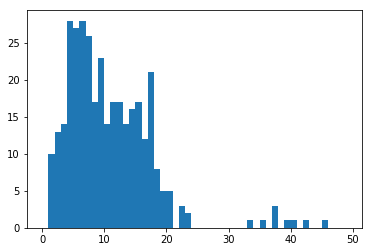

In [54]:
logg = b_full[:,1]
M = b_full[:,3]
Prot = b_full[:,5]
g = 10**logg

G_const = 27488

R = G_const * M / g

v = 2*np.pi*R / Prot

plt.hist(v, np.arange(0, 50, 1))

In [63]:
allstars = np.loadtxt('RedGiants.txt', usecols=[0, 3, 4, 7, 8, 9, 10], delimiter='|', skiprows=1)

In [75]:
allstars[allstars[:,0] == 9116231]

array([], shape=(0, 7), dtype=float64)

In [76]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

from astroquery.simbad import Simbad

In [78]:
customSimbad = Simbad()
customSimbad.add_votable_fields('ra')
customSimbad.add_votable_fields('dec')

from astroquery.vizier import Vizier
from astropy.coordinates import Angle

In [105]:
vquery = Vizier(columns=['**','Source', 'RA_ICRS', 'DE_ICRS', '_r',
                             'Gmag', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'pmRApmDEcor', 'Plx', 'e_Plx', 'PlxpmRAcor', 'PlxpmDEcor', 'radial_velocity', 'radial_velocity_error', 'rv_nb_transits', 'astrometric_excess_noise_sig'])

#coord = SkyCoord(ra=ra, dec=dec, unit=(u.degree, u.degree), frame='icrs')
result = vquery.query_object("KIC 9116231", catalog=["I/345/gaia2"])

closest = np.where(result[0]['_r'] == np.min(result[0]['_r']))
res = result[0][:][closest][0]

sig = 0.5*(res['B_Rad'] - res['b_Rad'])

print(res['Rad'], sig)

radval = np.random.normal(res['Rad'], sig, 10000)

v = 8.05 * 2*np.pi*radval/Prot 

print(np.median(v), np.std(v))


-- --
nan nan


/Users/ozymandias1/anaconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: Warning: converting a masked element to nan.
/Users/ozymandias1/anaconda2/envs/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
